<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad2/5_Maquinas_de_Soporte_SVR_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 5: **Máquinas de Soporte para Regresión (SVR)**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

### **Máquinas de Soporte para Regresión (SVR)**:

**Como funciona**  
- SVR busca una línea (o hiperplano en espacios multidimensionales) que se ajuste a los datos con la menor complejidad posible, es decir, que sea lo más plana posible, pero que también respete un margen de tolerancia.

**Características**
- Es una extensión de las máquinas de soporte vectorial (SVM) para problemas de regresión.
- Es **sensible a la escala de los datos**, por eso se **requiere escalamiento de los datos**.
- Intenta ajustar una función que tenga una desviación máxima **ε** permitida del valor real.

**Ventajas**
- Muy potente para relaciones no lineales (con kernels).
- Robusto frente a outliers si se ajustan bien los parámetros.
- Muy eficaz para relaciones no lineales complejas.
- Buena generalización.

**Limitaciones**
- Lento en datasets grandes.
- Requiere cuidadosa selección de hiperparámetros y escalado de datos.

**Soporte vectorial:**  
- Solo los puntos que caen fuera del margen ε (los que tienen errores significativos) influyen en el modelo. Estos puntos se llaman vectores de soporte.


**Kernels:**  
- SVR puede usar funciones kernel (como el radial RBF, polinomial, etc.) para modelar relaciones no lineales entre las variables.


#### **Parámetros importantes en SVR**

- **C:** controla el compromiso entre el margen y el error. Valores altos permiten menos errores pero pueden sobreajustar.
- **ε:** define el margen de tolerancia. Valores pequeños hacen que el modelo sea más preciso pero más sensible al ruido.
- **kernel:** define la forma de la función de predicción (lineal, RBF, polinomial, etc.).
- **gamma:** afecta la forma del kernel (especialmente en RBF).


### **Comparación con los modelos anteriores**:

| Técnica              | Linealidad | Flexibilidad | Requiere Escalado | Overfitting | Interpretabilidad |
|----------------------|------------|--------------|--------------------|-------------|-------------------|
| Regresión Lineal     | Alta       | Baja         | No                 | Baja        | Alta              |
| Árboles / RandomForest| Baja       | Alta         | No                 | Media-Baja  | Media             |
| **SVR**                  | Muy Baja   | Alta         | **Sí**             | Baja        | Baja              |


## **1. Cargar datos y librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("autos2.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [3]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Escalamiento de variables**

In [5]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


## **5. Entrenar modelo SVR**

In [6]:
svr_model = SVR(kernel='rbf', C=100, epsilon=0.2)

# Entrenar el modelo con los datos escalados
svr_model.fit(X_train_scaled, y_train_scaled)


SVR(C=100, epsilon=0.2)

## **6. Evaluar el modelo**

In [7]:
# Predecir valores con datos de prueba escalados
y_pred_scaled = svr_model.predict(X_test_scaled)

# Desescala las Predicciones: Usamos el mismo objeto StandardScaler
# para escalar y (el precio) para revertir la escala:
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calcula las métricas comparando las predicciones desescaladas (y_pred)
# con las etiquetas de prueba originales (y_test):
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse_svr:.2f}")
print(f"Coeficiente de determinación (R²): {r2_svr:.2f}")


Error cuadrático medio (MSE): 19050289.52
Coeficiente de determinación (R²): 0.84


In [8]:
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse_svr)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")

Raíz del Error cuadrático medio (RMSE): 4364.66


### **Interpretación**
#### **1. RMSE ≈ 4,365**

* Esto indica que el modelo se equivoca en promedio en unos $4,365 por auto.
* Comparado con el rango de precios (8,000 a 16,000), ese error representa entre 26% y 56%.
* Es significativamente mayor que los errores obtenidos con árbol de decisión y random forest.

#### **2. R² = 0.84**
* El modelo explica el 84% de la variación en los precios, lo cual no es malo, pero es inferior al 92% de los otros modelos.

#### **3. ¿Por qué SVR tiene menor rendimiento?**

* Sensibilidad al escalado: Aunque se usó StandardScaler, puede que la escala de las variables aún no sea ideal para el kernel RBF.
* Hiperparámetros: SVR requiere ajuste cuidadoso de C, epsilon y gamma. Un grid search podría mejorar el rendimiento.
* Datos ruidosos o no lineales: SVR puede tener dificultades si la relación entre variables no es suave o está muy dispersa.
* Dataset pequeño: SVR no es tan eficiente con pocos datos y muchos valores atípicos.
* **Puede mejorar significativamente con ajuste de hiperparámetros (GridSearchCV).**

## **7. Comparar precios reales vs predichos**

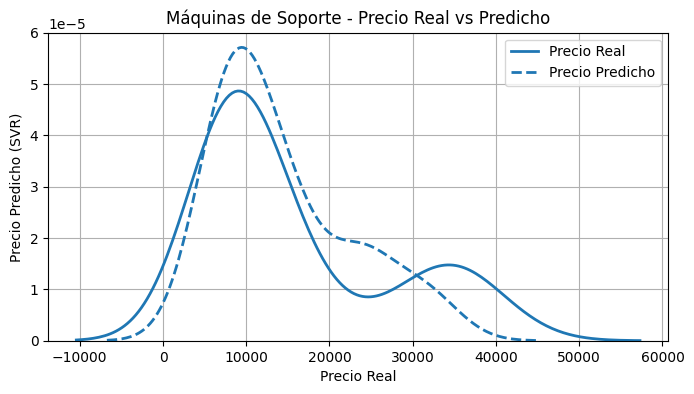

In [9]:
#plt.scatter(y_test, y_pred, color='purple')
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (SVR)")
plt.title("Máquinas de Soporte - Precio Real vs Predicho")
plt.grid(True)
plt.legend()
plt.show()


### **Comparar precios con diagrama de dispersión**



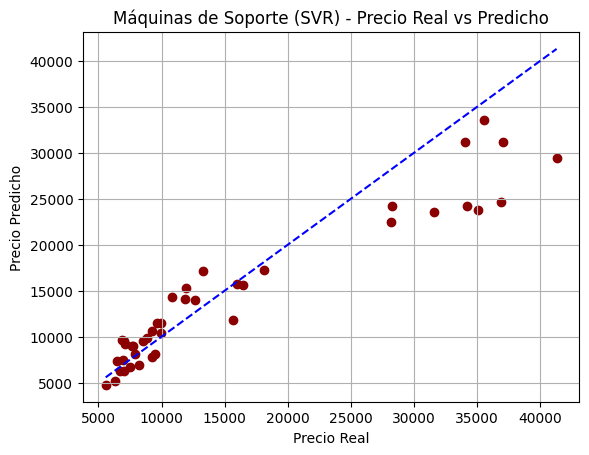

In [10]:
plt.scatter(y_test, y_pred, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Máquinas de Soporte (SVR) - Precio Real vs Predicho")
plt.grid(True)
plt.show()

### **Interpretación**  
A medida que el precio real aumenta, la dispersión de los puntos se vuelve significativamente mayor, y el modelo muestra una tendencia a subestimar los precios.
* Para los vehículos más caros ($\text{Precio Real}$ alrededor de $35,000$ a $40,000$), el modelo predice precios mucho más bajos ($\text{Precio Predicho}$ alrededor de $24,000$ a $34,000$).
* Hay una clara brecha vertical en las predicciones para vehículos caros. Por ejemplo, los precios reales de $\approx 35,000$ a $40,000$ tienen predicciones que se agrupan en dos niveles: uno alrededor de $\approx 24,000$ y otro alrededor de $\approx 31,000$ a $34,000$.

Por lo tanto, el modelo SVR es muy robusto y preciso para la mayoría de los vehículos (aquellos con precios bajos y medios). Sin embargo, pierde precisión de manera notable para los vehículos de gama alta.

### **Búsqueda de mejores parámetros**

In [11]:

from sklearn.model_selection import GridSearchCV

# Parámetros a probar
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Inicialización y ajuste usando datos escalados
grid_search = GridSearchCV( SVR(), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_scaled) # Entrena con datos escalados

# Mejor modelo
best_svr = grid_search.best_estimator_
print("\n Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Predecir valores con datos de prueba escalados
y_pred_scaled = best_svr.predict(X_test_scaled)  # Se usa X_test_scaled

# B. Desescala las Predicciones
# La predicción (y_pred_scaled) está en la escala de Y (0 a 1).
# Debemos devolverla a la escala de precio original usando scaler_y.
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calcular métricas (comparando predicción desescalada con y_test original)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n Resultados del mejor modelo:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {np.sqrt(mse):.2f}")



Fitting 3 folds for each of 180 candidates, totalling 540 fits

 Mejores parámetros encontrados:
{'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}

 Resultados del mejor modelo:
Error cuadrático medio (MSE): 23658789.30
Coeficiente de determinación (R²): 0.81
Raíz del error cuadrático medio (RMSE): 4864.03


### El mensaje ***Fitting 3 folds for each of 180 candidates, totalling 540 fits*** significa:

#### **180 candidates:**
- Se refiere a la cantidad total de combinaciones diferentes de hiperparámetros que el GridSearchCV va a probar.
- Proviene del tamaño del diccionario *param_grid* que se definio. por ejemplo, si multiplicamos todas las combinaciones posibles.

**3 × 4 × 3 × 5 = 180 combinaciones**

#### **3 folds:**
Significa que se está usando validación cruzada (cross-validation) con 3 particiones (folds).
- El conjunto de entrenamiento se divide en 3 partes iguales.
- En cada iteración, se entrena el modelo con 2 partes y se valida con la parte restante.
- Esto se repite 3 veces, cambiando la parte usada para validar.

#### **Totalling 540 fits:**
- Cada una de las 180 combinaciones de hiperparámetros se prueba 3 veces (una por cada fold).
Por eso: 180 combinaciones × 3 folds = 540 entrenamientos (“fits”)

#### **GridSearchCV va a:**
- Entrenar 540 modelos en total.
- Cada modelo tendrá una combinación diferente de hiperparámetros.
- Cada combinación se evalúa con validación cruzada de 3 partes.
- Al final, **el modelo que obtenga el mejor desempeño promedio** (por ejemplo, mejor R²) se guarda en **grid_search.best_estimator_**.

### **Modelo Final Óptimo**  

* El Grid Search identificó la siguiente configuración como la mejor para el modelo de Máquinas de Vectores de Soporte para Regresión (SVR):

| Hiperparámetro | Mejor Valor | Significado |
|----------------------|------------|-------|
|**kernel**|**'rbf'**|Se utiliza una función de base radial (RBF) para mapear los datos a un espacio dimensional superior, lo que permite relaciones no lineales.|
|**C**|**10**|Un valor moderado que permite cierto error de clasificación/regresión, mejorando la generalización.|
|**epsilon**|**0.01**|Define un margen de tolerancia para las predicciones. Un valor pequeño ($\mathbf{0.01}$) obliga al modelo a ser muy preciso.|
|**gamma**|**0.1**|Controla la influencia de un solo ejemplo de entrenamiento; un valor más pequeño significa una influencia más amplia.|

### Conclusiones
* El modelo SVR optimizado explica el $81\%$ de la varianza en el precio de los vehículos en los datos no vistos. Esto es un buen rendimiento.
* En promedio, el precio predicho por el modelo se desvía del precio real por $\mathbf{\$4,864.03}$
- El valor $R^2=0.85877$ del Grid Search es solo una estimación de rendimiento generalizada obtenida a través de validación cruzada, y **el modelo que fue seleccionado por Grid Search fue diseñado para ser más estable** (menos propenso al sobreajuste) debido a las restricciones como max_depth: 8.
- El hecho de que **un modelo sin optimizar supere al modelo de Grid Search** podría indicar que:
  - El rango de valores que se definió en **param_grid no incluyó la configuración óptima** (es decir, el modelo con $n\_estimators=100$ no se probó con las mismas restricciones que el resto de combinaciones, o la combinación de $R^2=0.92$ no estuvo presente en la rejilla).
  * O que el rendimiento de $0.92$ fue simplemente **una coincidencia afortunada** con la división específica del conjunto de prueba.

